## Clustering and annotation

In [3]:
import sys
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
import anndata as ad

In [16]:
import anndata as ad

# Load the .h5ad file
adata = ad.read('liver_uce_adata.h5ad')

In [3]:
adata.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 9230 × 15401
    obs: 'treatment', 'sample', 'n_genes'
    var: 'n_cells'
    obsm: 'X_uce'>

In [37]:
adata.X

array([[0.        , 0.        , 0.        , ..., 0.        , 7.205109  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 4.806305  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 7.0171924 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.929748  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.7633    , 4.367971  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.96036243, 3.5041409 ,
        0.        ]], dtype=float32)

In [4]:
for col in adata.obs.select_dtypes(['category']).columns:
    adata.obs[col] = adata.obs[col].astype(str)

In [5]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.neighbors(adata, use_rep='X_uce')
sc.tl.umap(adata)
sc.tl.leiden(adata)

2024-12-12 09:50:52.779414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-12 09:50:53.065648: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 09:50:56.436646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-12-12 09:50:56.436900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [6]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCAAGGGCAGTT-1    normal  whole       63                 63   
AAACCCAGTTTCGACA-1    normal  whole     1496               1472   
AAACCCATCGGCACTG-1    normal  whole       53                 53   
AAACCCATCTCCAATT-1    normal  whole       76                 76   
AAACGAAAGAAGTGTT-1    normal  whole      146                145   
...                      ...    ...      ...                ...   
TTTGTTGGTCACTTCC-1      nash  whole     4642               4558   
TTTGTTGTCCAATGCA-1      nash  whole      564                555   
TTTGTTGTCCACGTGG-1      nash  whole      881                866   
TTTGTTGTCGCCAATA-1      nash  whole     3297               3223   
TTTGTTGTCTCCGATC-1      nash  whole     2807               2745   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCAAGGGCAGTT-1                 4.158883        1115.0            7.017506   
AAACCCAGTTTCGACA-1                 7.295056        2721.0            7.909122   
AAACCCATCGGCACTG-1                 3.988984         942.0            6.849066   
AAACCCATCTCCAATT-1                 4.343805        3343.0            8.114923   
AAACGAAAGAAGTGTT-1                 4.983607        1321.0            7.186901   
...                                     ...           ...                 ...   
TTTGTTGGTCACTTCC-1                 8.424859       15201.0            9.629182   
TTTGTTGTCCAATGCA-1                 6.320768         992.0            6.900731   
TTTGTTGTCCACGTGG-1                 6.765039        1529.0            7.333023   
TTTGTTGTCGCCAATA-1                 8.078378        8731.0            9.074750   
TTTGTTGTCTCCGATC-1                 7.917901        6201.0            8.732627   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGGCAGTT-1                   98.834081                   100.000000   
AAACCCAGTTTCGACA-1                   24.108784                    32.010290   
AAACCCATCGGCACTG-1                   99.681529                   100.000000   
AAACCCATCTCCAATT-1                   99.222255                   100.000000   
AAACGAAAGAAGTGTT-1                   92.808478                    96.593490   
...                                        ...                          ...   
TTTGTTGGTCACTTCC-1                   13.209657                    20.406552   
TTTGTTGTCCAATGCA-1                   43.346774                    53.427419   
TTTGTTGTCCACGTGG-1                   28.515370                    38.783519   
TTTGTTGTCGCCAATA-1                   19.104341                    26.090940   
TTTGTTGTCTCCGATC-1                   15.416868                    22.657636   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGGCAGTT-1                   100.000000                   100.000000   
AAACCCAGTTTCGACA-1                    43.476663                    64.277839   
AAACCCATCGGCACTG-1                   100.000000                   100.000000   
AAACCCATCTCCAATT-1                   100.000000                   100.000000   
AAACGAAAGAAGTGTT-1                   100.000000                   100.000000   
...                                         ...                          ...   
TTTGTTGGTCACTTCC-1                    30.044076                    46.378528   
TTTGTTGTCCAATGCA-1                    64.213710                    94.455645   
TTTGTTGTCCACGTGG-1                    52.517986                    76.062786   
TTTGTTGTCGCCAATA-1                    35.391135                    52.559844   
TTTGTTGTCTCCGATC-1                    33.059184                    51.588453   

                   leiden  
AAACCCAAGGGCAGTT-1      1  
AAACCCAGTTTCGACA-1      4  
AAACCCATCGGCACTG-1      1  
AAACCCATCTCCAATT-1      1  
AAACGAAAGAAGTGTT-1      1  
...                   ...  
TTTGTTGGTCACTTCC-1      0  
TTTGTTGTCCAATGCA-1      8  
TTTGTTGTCCACGTGG-1     15  
TTTGTTGTCGCCAATA-1      3  
TTTGTTGTCTCCGATC-1     

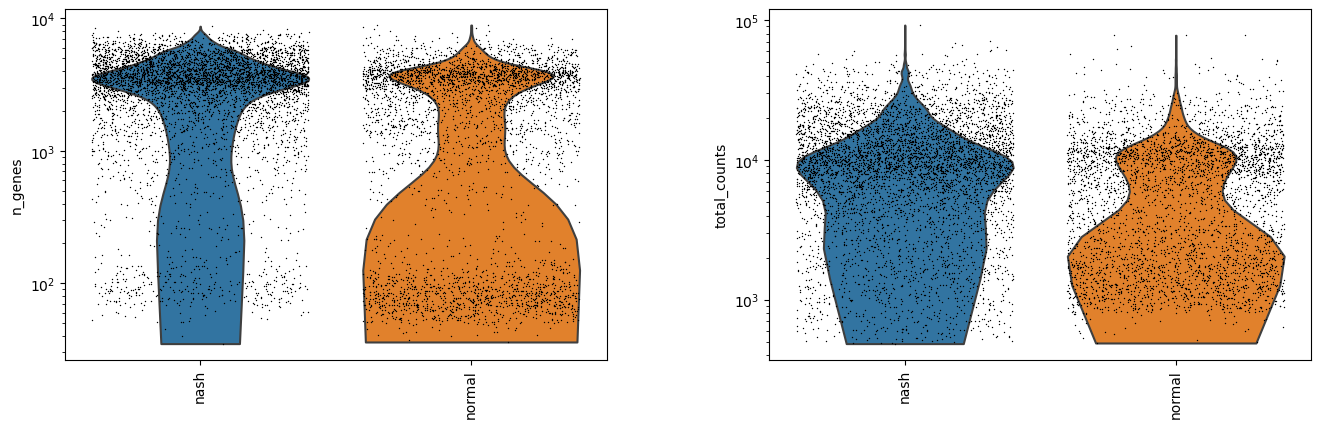

In [7]:
sc.pl.violin(adata, ['n_genes', 'total_counts'], rotation=90,
             groupby='treatment', jitter=0.4, multi_panel=True, log=True, cut=0)

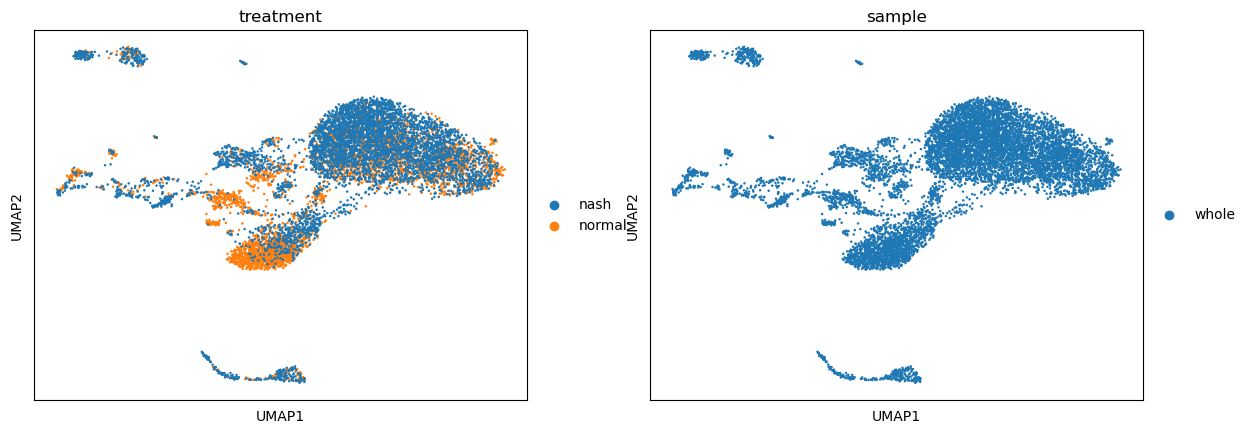

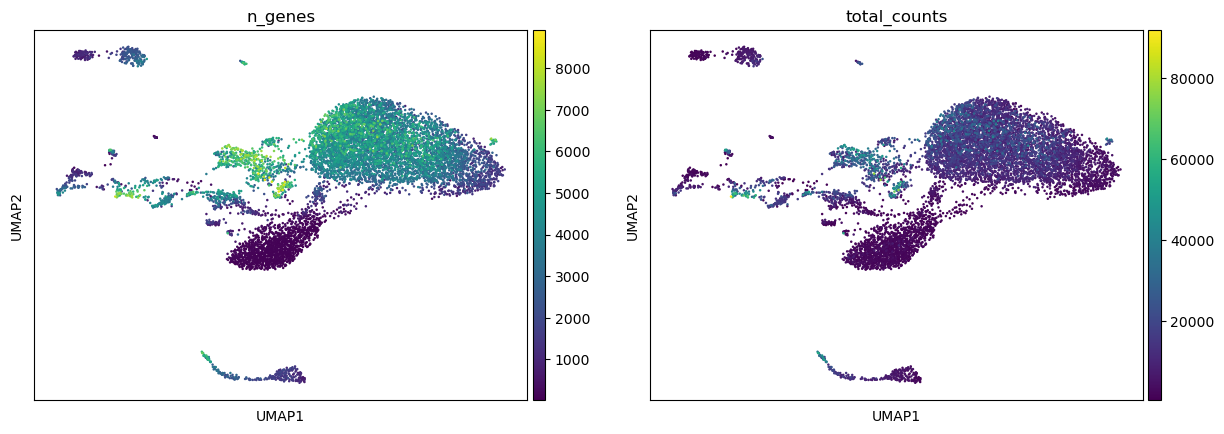

In [8]:
sc.pl.umap(adata, color=['treatment','sample'])
sc.pl.umap(adata, color=['n_genes','total_counts'], groups=['true'])
#sc.pl.umap(adata, color='ribo_bool', frameon=True, vmax='p90', groups=['true'])

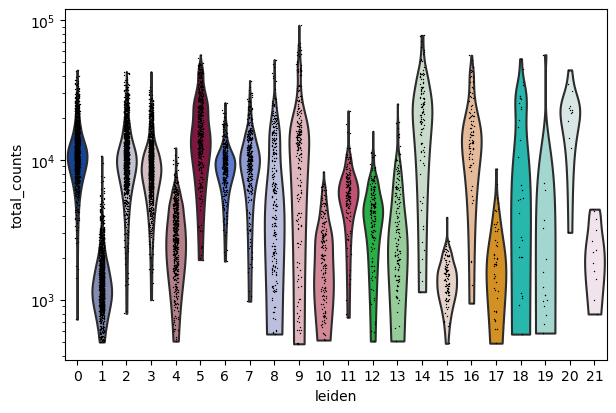

In [9]:
sc.pl.violin(adata, keys=['total_counts'], groupby='leiden', frameon=False, log=True)

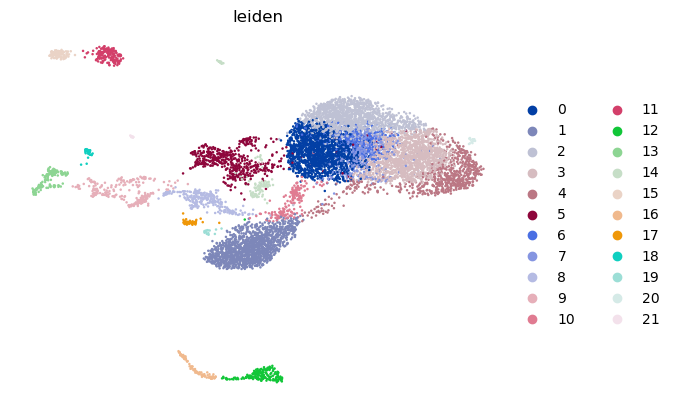

In [10]:
sc.pl.umap(adata, color='leiden', frameon=False)

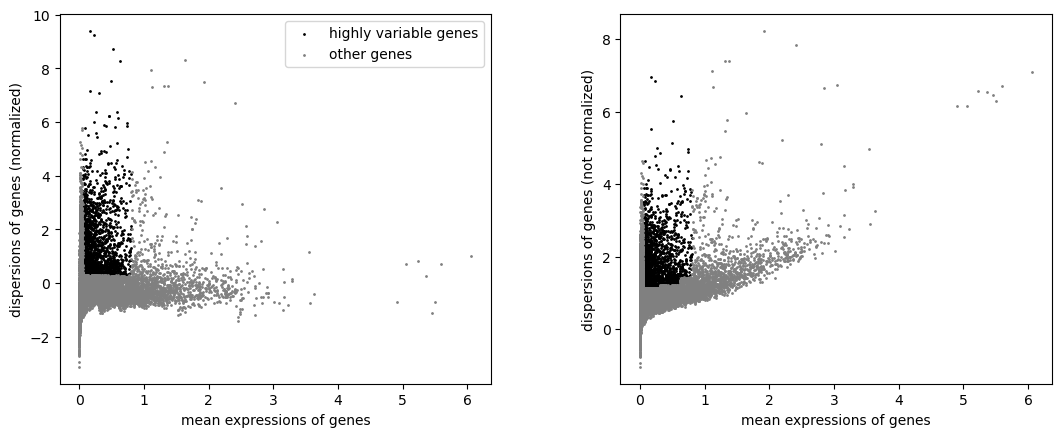

Found 1763 variables genes of 15401 total


In [38]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=0.8, min_disp=0.3)
sc.pl.highly_variable_genes(adata, log=False)
print('Found %i variables genes of %i total' %(sum(adata.var['highly_variable']), adata.var.shape[0] ) )

In [39]:
sc.tl.rank_genes_groups(adata, "leiden", test='wilcoxon')

/home/nb752/.conda/envs/CellBenderEnv/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/nb752/.conda/envs/CellBenderEnv/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/nb752/.conda/envs/CellBenderEnv/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399:

In [40]:
marker_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
marker_genes.head(10)

0        1        2        3         4       5        6         7  \
0   Selenop   mt-Nd2    Iigp1    Ptprb     Stab2  Tmsb4x    Ptprb     Ptprb   
1    Igfbp7   mt-Co2     Egr1   Rasal2     Ptprb    Actb    Plpp3       Maf   
2  Dnase1l3   mt-Nd4   Rnf213    Stab2     Lrmda  Rpl37a     Aqp1   Selenop   
3      Aqp1   mt-Co3    Clic4   Igfbp7    Sema6a   Rplp1      Kdr     Plpp3   
4     Sparc  mt-Atp6     Junb      Maf      Psd3   Rps28      Maf      Aqp1   
5    Ifitm2  mt-Cytb      Ubc      Eng   Plekhg1    Psap  Selenop  Dnase1l3   
6    Gpr182   mt-Nd1      Fos  Selenop     Meis2   Rpl41   Adgrf5    Adgrf5   
7    Clec4g   mt-Nd5     Aqp1   Sema6a    Rasal2     B2m     Mrc1       Kdr   
8       Maf   mt-Nd3  Selenop    Meis2     Macf1  Eef1a1     Nrp1    Gpr182   
9       Eng   mt-Co1   Cdkn1a     Psd3  Arhgap31   Rps29    Meis2    Igfbp7   

        8         9  ...       12        13        14        15       16  \
0    Ctss    Laptm5  ...   Clec4d     Dock2      Fth1      Ebf1   S100a9   
1    C1qc  Arhgap15  ...     Srgn    Dock10     Rbms3      Cd74      Ngp   
2    C1qa    Coro1a  ...  Slc7a11  Arhgap15      Sox5     Bach2   S100a8   
3    Ctsb    Dock10  ...    Csf3r     Ptprc  Tmem176b      Aff3  Pglyrp1   
4   Csf1r     Napsa  ...    Sgms2     Skap1     Bicc1  Arhgap15     Camp   
5    Gpx1     Elmo1  ...    Ptprc     Runx1        C3     Foxp1       Hp   
6    Ctsc     Dock2  ...     Cd44       Itk  Serping1    Ripor2   Wfdc21   
7    C1qb     Runx1  ...    Xylt1    Ptpn22     Pard3     Bank1     Lcn2   
8    Cd5l     Ptprc  ...   Entpd1    Vps37b      Sdc4    Inpp5d      Tkt   
9  Laptm5   Alox5ap  ...    Cebpb     Elmo1    Tmsb10      Igkc   Coro1a   

       17         18       19      20      21  
0    Actb       Igkc      Dbi   Top2a  Hba-a1  
1    Gpx1     Jchain    Fabp1   Kif23  Hba-a2  
2  Tmsb4x    Hsp90b1    Mat1a   Mki67  Hbb-bs  
3    Fth1       Cd74    Cyb5a     Eng  Hbb-bt  
4    Ftl1  Trp53inp1    Aldh2    Nav2   Alas2  
5   Actg1       Xbp1  Stard10    Gnas   Epb41  
6    Txn1   Arhgap15    Prdx1   Kif11   Mkrn1  
7  Lgals3     Txndc5     Comt  Iqgap3  Ube2l6  
8   Prdx1       Mzb1    Aldob    Nfia    Bpgm  
9  Eef1a1    Tspan13     Cdo1   Stmn1  Tent5c  

[10 rows x 22 columns]

In [13]:
marker_genes[['6']].head(10)

6
0     Nrp1
1      Kdr
2   Sema6a
3     Psd3
4    Plpp3
5   Rasal2
6   Adgrf5
7    Prkce
8     Ehd3
9  Plekhg1

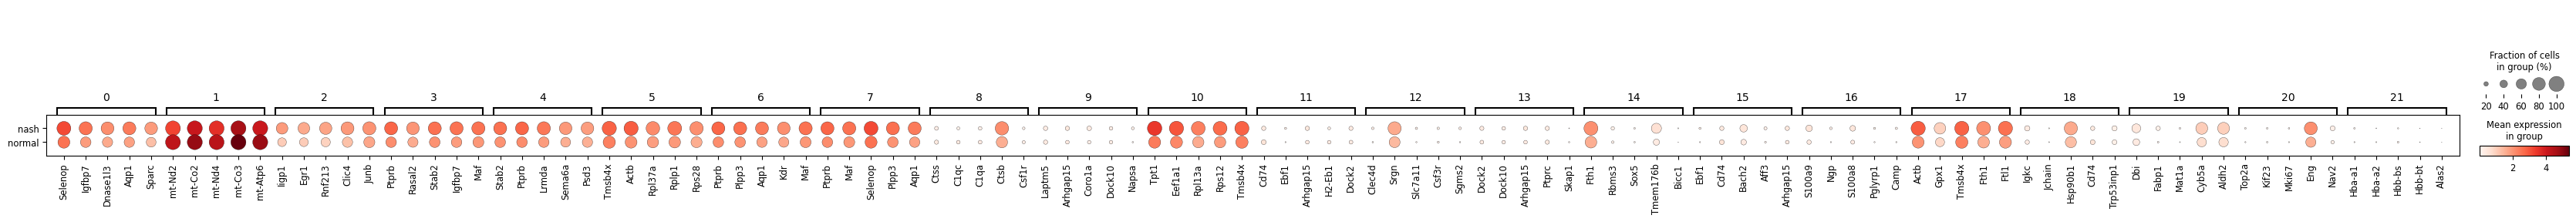

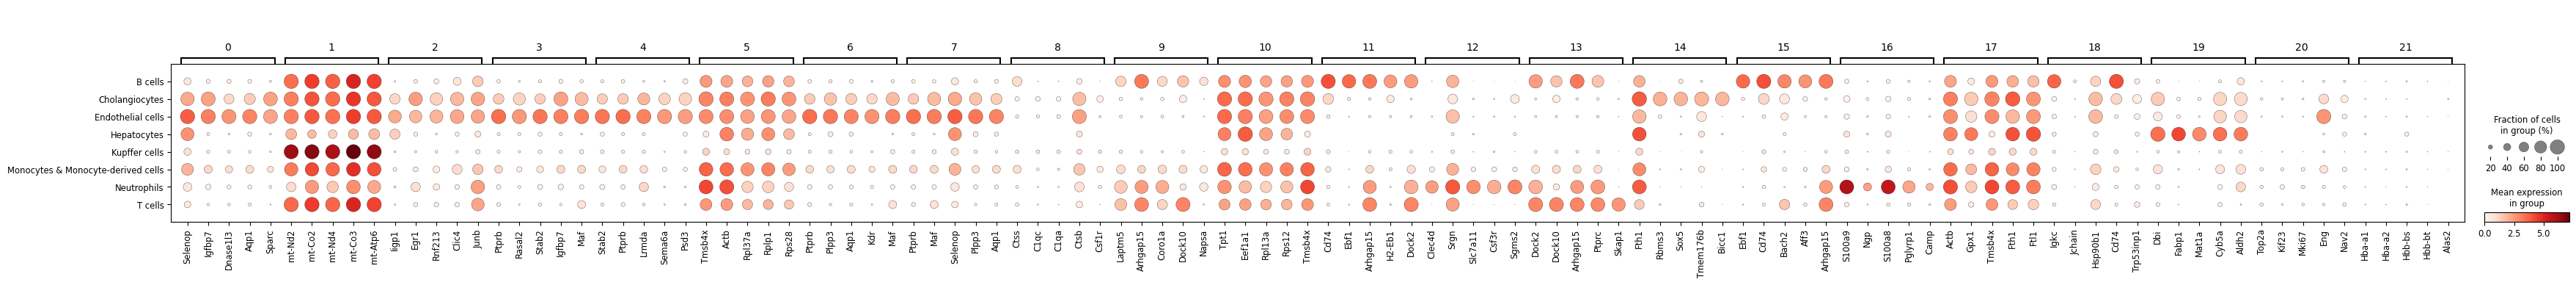

In [104]:
top_marker_genes = marker_genes.head(5)
sc.pl.dotplot(adata, var_names=top_marker_genes.to_dict('list'), groupby='treatment')
sc.pl.dotplot(adata, var_names=top_marker_genes.to_dict('list'), groupby='cell_type')

In [19]:
## Celltypist
import scipy.sparse as sp 
import celltypist
from celltypist import models

model_path = '/home/nb752/project/cbb_uce/Healthy_Mouse_Liver.pkl'
model = models.Model.load(model=model_path)

In [20]:
model

CellTypist model with 17 cell types and 1988 features
    date: 2023-07-28 12:16:49.675179
    details: cell types from scRNA-seq and snRNA-seq of the healthy murine liver
    source: https://doi.org/10.1016/j.cell.2021.12.018
    version: v1
    cell types: B cells, Basophils, ..., pDCs
    features: Xkr4, Gm16041, ..., Grk5

In [21]:
model.cell_types

array(['B cells', 'Basophils', 'Cholangiocytes', 'Endothelial cells',
       'Fibroblasts', 'Hepatocytes', 'HsPCs', 'ILC1s', 'Kupffer cells',
       'Mig. cDCs', 'Monocytes & Monocyte-derived cells', 'NK cells',
       'Neutrophils', 'T cells', 'cDC1s', 'cDC2s', 'pDCs'], dtype=object)

In [22]:
# Calculate scaling factors to normalize each cell to 10,000 counts
total_counts_per_cell = np.array(adata.X.sum(axis=1)).flatten()
scaling_factors = 10000 / total_counts_per_cell

# Scale each cell by its scaling factor
adata.X = adata.X.multiply(scaling_factors[:, None]) if sp.issparse(adata.X) else adata.X * scaling_factors[:, None]

# Apply log1p transformation in-place
adata.X = np.log1p(adata.X)

adata.X.expm1().sum(axis = 1)

matrix([[10000.001],
        [10000.049],
        [10000.   ],
        ...,
        [ 9999.964],
        [10000.081],
        [ 9999.963]], dtype=float32)

In [23]:
import scipy
if isinstance(adata.X, (scipy.sparse.coo_matrix, scipy.sparse.csr_matrix, scipy.sparse.csc_matrix)):
    adata.X = adata.X.toarray()

In [24]:
predictions = celltypist.annotate(adata, model, majority_voting = True)

🔬 Input data has 9230 cells and 15401 genes
🔗 Matching reference genes in the model
🧬 1221 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [25]:
predictions.predicted_labels

predicted_labels over_clustering    majority_voting
AAACCCAAGAGGGTAA-1  Endothelial cells               8  Endothelial cells
AAACCCAAGCGTTGTT-1  Endothelial cells              32  Endothelial cells
AAACCCAAGGGCAGTT-1      Kupffer cells              44      Kupffer cells
AAACCCAGTTCAAAGA-1  Endothelial cells              65  Endothelial cells
AAACCCAGTTTCGACA-1  Endothelial cells              28  Endothelial cells
...                               ...             ...                ...
TTTGTTGGTCACTTCC-1  Endothelial cells              50  Endothelial cells
TTTGTTGTCCAATGCA-1      Kupffer cells              72      Kupffer cells
TTTGTTGTCCACGTGG-1            B cells              18            B cells
TTTGTTGTCGCCAATA-1  Endothelial cells              62  Endothelial cells
TTTGTTGTCTCCGATC-1  Endothelial cells              49  Endothelial cells

[9236 rows x 3 columns]

In [26]:
predictions.predicted_labels.index = predictions.predicted_labels.index.map(str)  # Ensure all indices are strings
predictions.predicted_labels = predictions.predicted_labels[~predictions.predicted_labels.index.duplicated(keep='first')]

In [27]:
adata = predictions.to_adata()

In [28]:
adata

AnnData object with n_obs × n_vars = 9230 × 15401
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_uce', 'X_umap'
    obsp: 'distances', 'connectivities'

In [29]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCAAGGGCAGTT-1    normal  whole       63                 63   
AAACCCAGTTTCGACA-1    normal  whole     1496               1472   
AAACCCATCGGCACTG-1    normal  whole       53                 53   
AAACCCATCTCCAATT-1    normal  whole       76                 76   
AAACGAAAGAAGTGTT-1    normal  whole      146                145   
...                      ...    ...      ...                ...   
TTTGTTGGTCACTTCC-1      nash  whole     4642               4558   
TTTGTTGTCCAATGCA-1      nash  whole      564                555   
TTTGTTGTCCACGTGG-1      nash  whole      881                866   
TTTGTTGTCGCCAATA-1      nash  whole     3297               3223   
TTTGTTGTCTCCGATC-1      nash  whole     2807               2745   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCAAGGGCAGTT-1                 4.158883        1115.0            7.017506   
AAACCCAGTTTCGACA-1                 7.295056        2721.0            7.909122   
AAACCCATCGGCACTG-1                 3.988984         942.0            6.849066   
AAACCCATCTCCAATT-1                 4.343805        3343.0            8.114923   
AAACGAAAGAAGTGTT-1                 4.983607        1321.0            7.186901   
...                                     ...           ...                 ...   
TTTGTTGGTCACTTCC-1                 8.424859       15201.0            9.629182   
TTTGTTGTCCAATGCA-1                 6.320768         992.0            6.900731   
TTTGTTGTCCACGTGG-1                 6.765039        1529.0            7.333023   
TTTGTTGTCGCCAATA-1                 8.078378        8731.0            9.074750   
TTTGTTGTCTCCGATC-1                 7.917901        6201.0            8.732627   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGGCAGTT-1                   98.834081                   100.000000   
AAACCCAGTTTCGACA-1                   24.108784                    32.010290   
AAACCCATCGGCACTG-1                   99.681529                   100.000000   
AAACCCATCTCCAATT-1                   99.222255                   100.000000   
AAACGAAAGAAGTGTT-1                   92.808478                    96.593490   
...                                        ...                          ...   
TTTGTTGGTCACTTCC-1                   13.209657                    20.406552   
TTTGTTGTCCAATGCA-1                   43.346774                    53.427419   
TTTGTTGTCCACGTGG-1                   28.515370                    38.783519   
TTTGTTGTCGCCAATA-1                   19.104341                    26.090940   
TTTGTTGTCTCCGATC-1                   15.416868                    22.657636   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGGCAGTT-1                   100.000000                   100.000000   
AAACCCAGTTTCGACA-1                    43.476663                    64.277839   
AAACCCATCGGCACTG-1                   100.000000                   100.000000   
AAACCCATCTCCAATT-1                   100.000000                   100.000000   
AAACGAAAGAAGTGTT-1                   100.000000                   100.000000   
...                                         ...                          ...   
TTTGTTGGTCACTTCC-1                    30.044076                    46.378528   
TTTGTTGTCCAATGCA-1                    64.213710                    94.455645   
TTTGTTGTCCACGTGG-1                    52.517986                    76.062786   
TTTGTTGTCGCCAATA-1                    35.391135                    52.559844   
TTTGTTGTCTCCGATC-1                    33.059184                    51.588453   

                   leiden   predicted_labels over_clustering  \
AAACCCAAGGGCAGTT-1      1      Kupffer cells              44   
AAACCCAGTTTCGACA-1      4  Endothelial cells              28   
AAACCCATCGGCACTG-1      1      Kupffer cells               2   
AAACCCATCTCCAATT-1      1      Kupffer cells              46   
AAACGAAAGAA

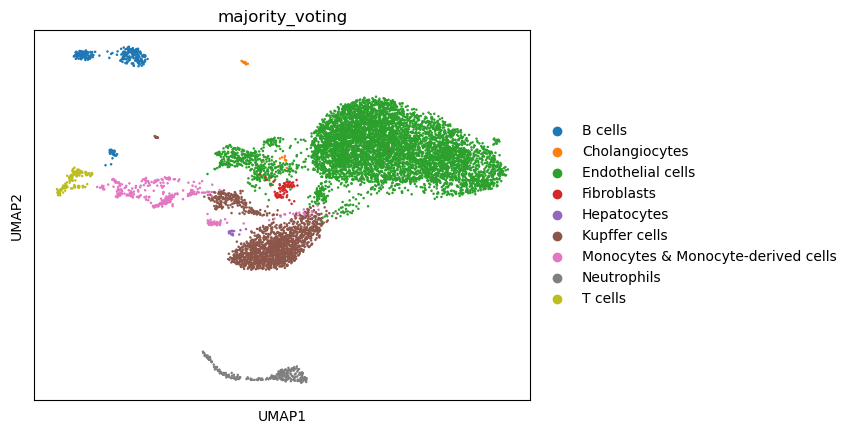

In [43]:
#sc.pl.umap(adata, color=['leiden'], show=True)
sc.pl.umap(adata, color=['majority_voting'], show=True)
#sc.pl.umap(adata, color=['cell_type'], legend_loc='on data', frameon=False)

In [31]:
unique_pairs = adata.obs[['leiden', 'majority_voting', 'conf_score']].drop_duplicates()
unique_pairs = unique_pairs.sort_values(by='leiden', ascending=True)

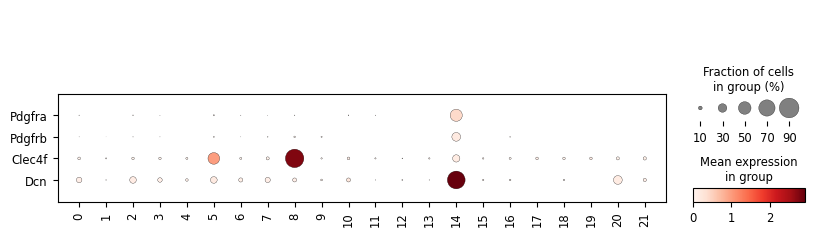

In [100]:
genes = ['Pdgfra','Pdgfrb','Clec4f','Dcn']
#fibro 'Col1a1', 'Col3a1', 'Dcn', 'Fn1'
#kuff 'Clec4f','Marco','Timd4', 'Fcgr1', 'Cd68'
#endo 'Nrp1', 'Kdr', 'Plpp3', 'Ehd3', 'Adgrf5'
#monocytes 'Ly6c1','Ccr2','Cx3cr1','Cd14','Fcgr1'
#Cholangiocyte 'Krt19','Krt7','Sox9','Cftr','Hnf1b'
#fibroblasts 'Pdgfra','Pdgfrb','Col1a1','Dcn'

dotplot = sc.pl.dotplot(adata, var_names=genes, groupby=['leiden'], swap_axes=True)

In [90]:
leiden_pairs = unique_pairs[unique_pairs['leiden'] == '14']

# For each unique 'leiden' and 'majority_voting' pair, get the row with the highest 'conf_score'
highest_conf_pairs = (
    leiden_pairs.sort_values('conf_score', ascending=False)
    .drop_duplicates(subset=['leiden', 'majority_voting'])
)

highest_conf_pairs

leiden majority_voting  conf_score
GTGTGGCTCGCCAATA-1     14     Fibroblasts         1.0
CAATACGAGCATCTTG-1     14  Cholangiocytes         1.0

In [ ]:
adata.obs['cell_type']=adata.obs['majority_voting']

In [95]:
cluster = {
    '0' : 'Endothelial cells',
    '1' : 'Kupffer cells',
    '2' : 'Endothelial cells',
    '3' : 'Endothelial cells',
    '4' : 'Endothelial cells',
    '5' : 'Endothelial cells',
    '6' : 'Endothelial cells',
    '7' : 'Endothelial cells',
    '8' : 'Kupffer cells',
    '9' : 'Monocytes & Monocyte-derived cells',
    '10' : 'Monocytes & Monocyte-derived cells',
    '11' : 'B cells',
    '12' : 'Neutrophils',
    '13' : 'T cells',
    '14' : 'Cholangiocytes',
    '15' : 'B cells',
    '16' : 'Neutrophils',
    '17' : 'Monocytes & Monocyte-derived cells',
    '18' : 'B cells',
    '19' : 'Hepatocytes',
    '20' : 'Endothelial cells', 
    '21' : 'Kupffer cells'
}

adata.obs['leiden'] = adata.obs['leiden'].astype(str)
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster)

In [96]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCAAGGGCAGTT-1    normal  whole       63                 63   
AAACCCAGTTTCGACA-1    normal  whole     1496               1472   
AAACCCATCGGCACTG-1    normal  whole       53                 53   
AAACCCATCTCCAATT-1    normal  whole       76                 76   
AAACGAAAGAAGTGTT-1    normal  whole      146                145   
...                      ...    ...      ...                ...   
TTTGTTGGTCACTTCC-1      nash  whole     4642               4558   
TTTGTTGTCCAATGCA-1      nash  whole      564                555   
TTTGTTGTCCACGTGG-1      nash  whole      881                866   
TTTGTTGTCGCCAATA-1      nash  whole     3297               3223   
TTTGTTGTCTCCGATC-1      nash  whole     2807               2745   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCAAGGGCAGTT-1                 4.158883        1115.0            7.017506   
AAACCCAGTTTCGACA-1                 7.295056        2721.0            7.909122   
AAACCCATCGGCACTG-1                 3.988984         942.0            6.849066   
AAACCCATCTCCAATT-1                 4.343805        3343.0            8.114923   
AAACGAAAGAAGTGTT-1                 4.983607        1321.0            7.186901   
...                                     ...           ...                 ...   
TTTGTTGGTCACTTCC-1                 8.424859       15201.0            9.629182   
TTTGTTGTCCAATGCA-1                 6.320768         992.0            6.900731   
TTTGTTGTCCACGTGG-1                 6.765039        1529.0            7.333023   
TTTGTTGTCGCCAATA-1                 8.078378        8731.0            9.074750   
TTTGTTGTCTCCGATC-1                 7.917901        6201.0            8.732627   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGGCAGTT-1                   98.834081                   100.000000   
AAACCCAGTTTCGACA-1                   24.108784                    32.010290   
AAACCCATCGGCACTG-1                   99.681529                   100.000000   
AAACCCATCTCCAATT-1                   99.222255                   100.000000   
AAACGAAAGAAGTGTT-1                   92.808478                    96.593490   
...                                        ...                          ...   
TTTGTTGGTCACTTCC-1                   13.209657                    20.406552   
TTTGTTGTCCAATGCA-1                   43.346774                    53.427419   
TTTGTTGTCCACGTGG-1                   28.515370                    38.783519   
TTTGTTGTCGCCAATA-1                   19.104341                    26.090940   
TTTGTTGTCTCCGATC-1                   15.416868                    22.657636   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGGCAGTT-1                   100.000000                   100.000000   
AAACCCAGTTTCGACA-1                    43.476663                    64.277839   
AAACCCATCGGCACTG-1                   100.000000                   100.000000   
AAACCCATCTCCAATT-1                   100.000000                   100.000000   
AAACGAAAGAAGTGTT-1                   100.000000                   100.000000   
...                                         ...                          ...   
TTTGTTGGTCACTTCC-1                    30.044076                    46.378528   
TTTGTTGTCCAATGCA-1                    64.213710                    94.455645   
TTTGTTGTCCACGTGG-1                    52.517986                    76.062786   
TTTGTTGTCGCCAATA-1                    35.391135                    52.559844   
TTTGTTGTCTCCGATC-1                    33.059184                    51.588453   

                   leiden   predicted_labels over_clustering  \
AAACCCAAGGGCAGTT-1      1      Kupffer cells              44   
AAACCCAGTTTCGACA-1      4  Endothelial cells              28   
AAACCCATCGGCACTG-1      1      Kupffer cells               2   
AAACCCATCTCCAATT-1      1      Kupffer cells              46   
AAACGAAAGAA

... storing 'leiden' as categorical
... storing 'cell_type' as categorical


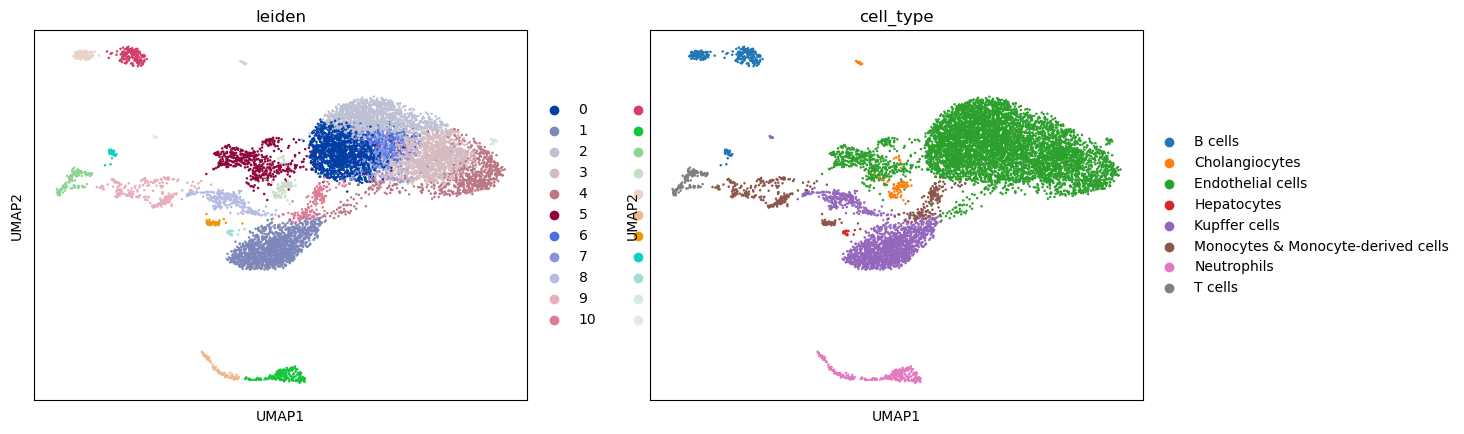

In [97]:
sc.pl.umap(adata, color=['leiden', 'cell_type'], show=True)

In [123]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added = "wilcoxon")

         Falling back to preprocessing with `sc.pp.pca` and default params.


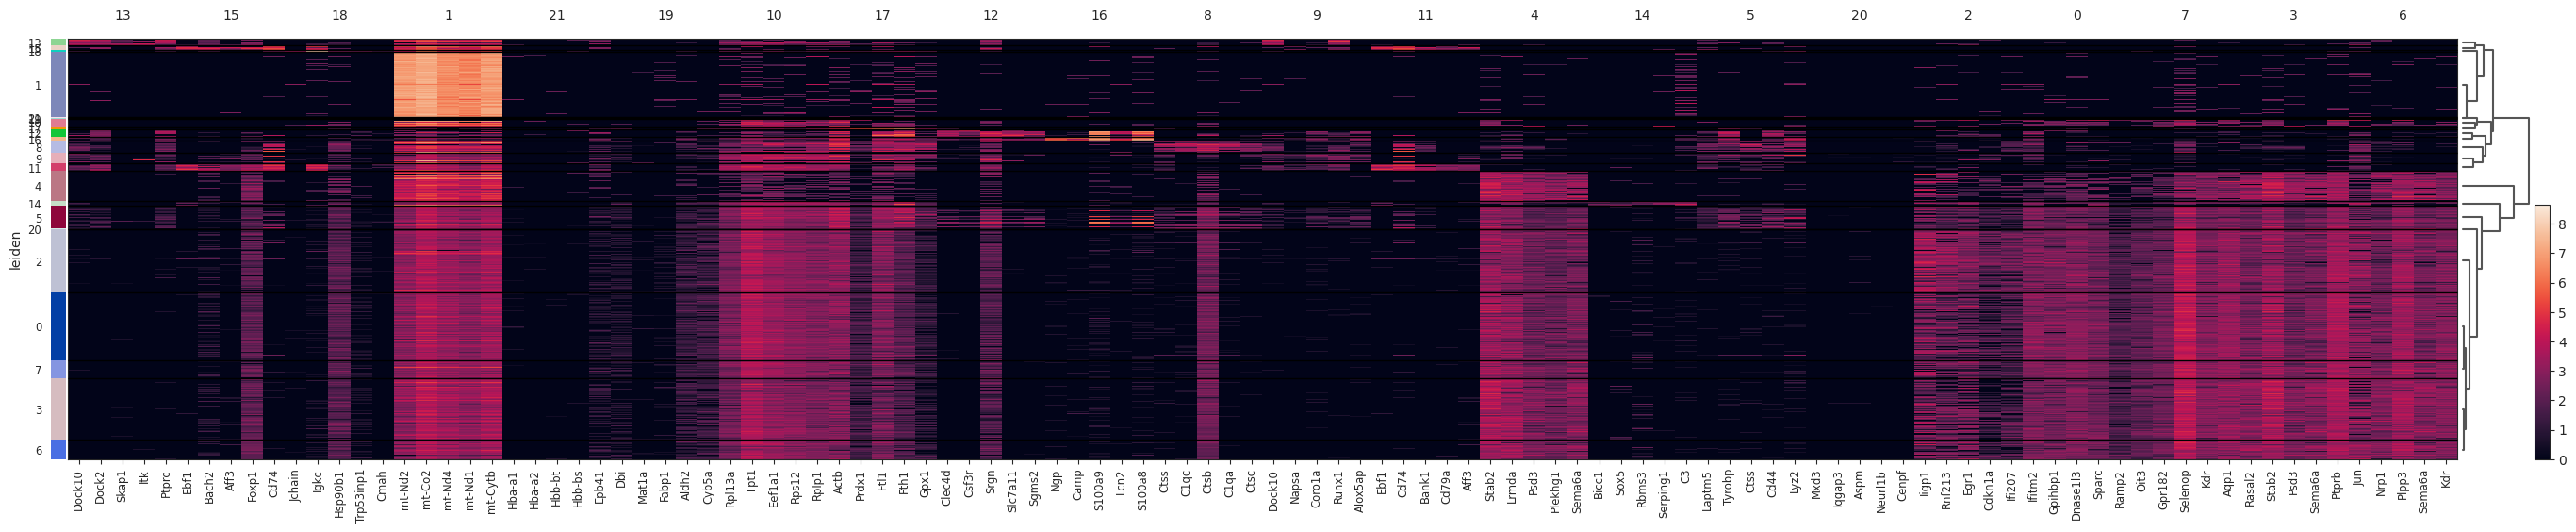

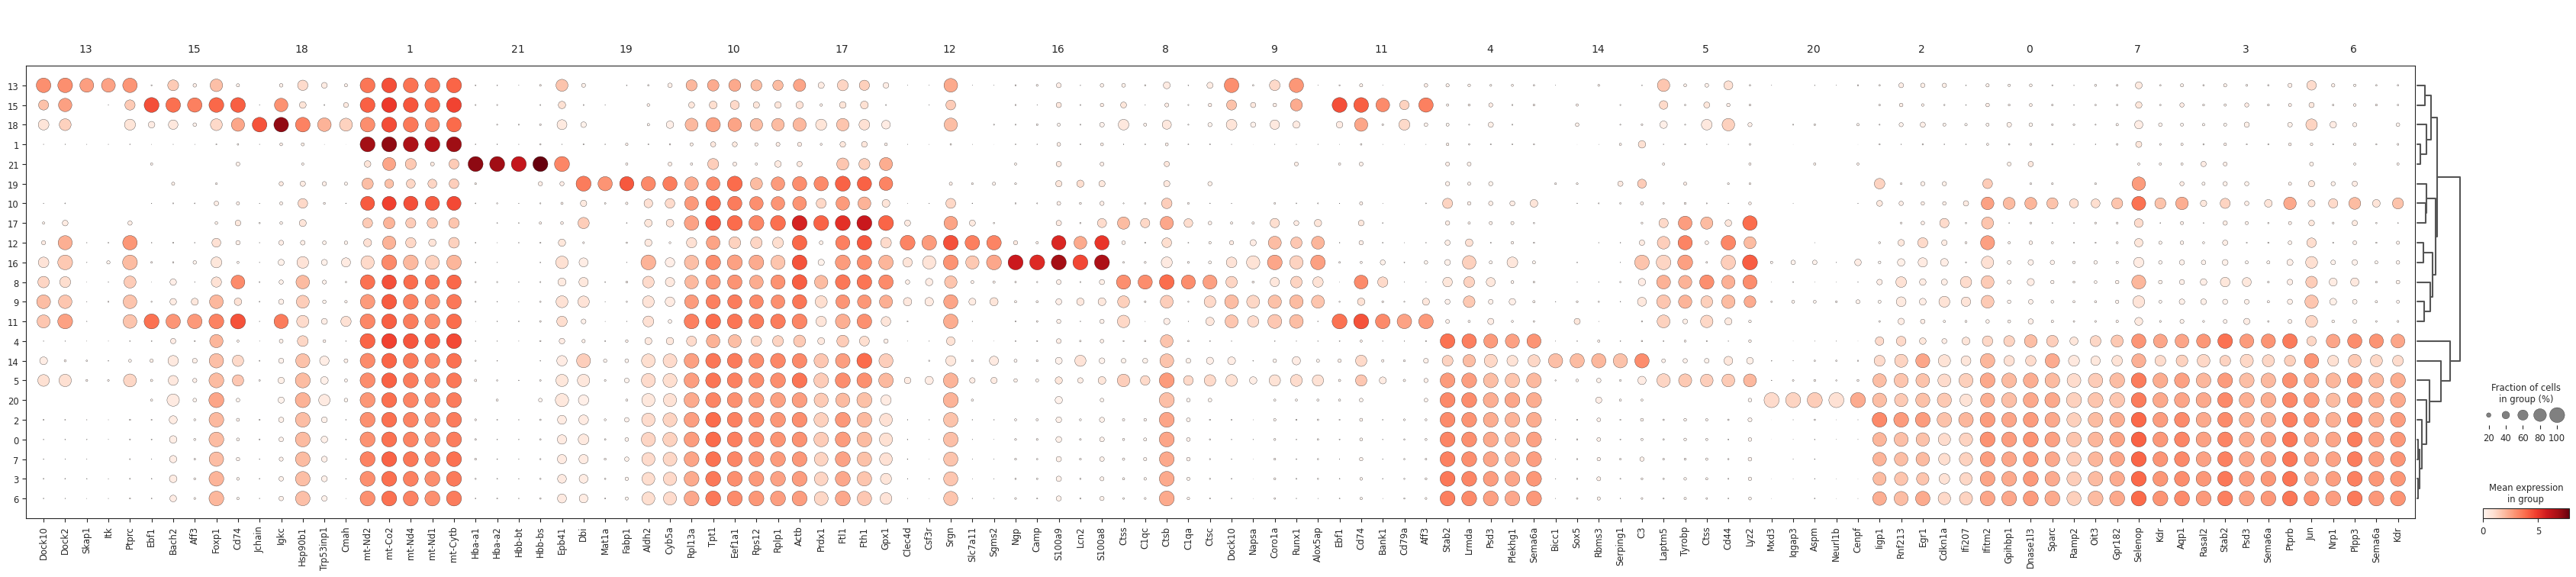

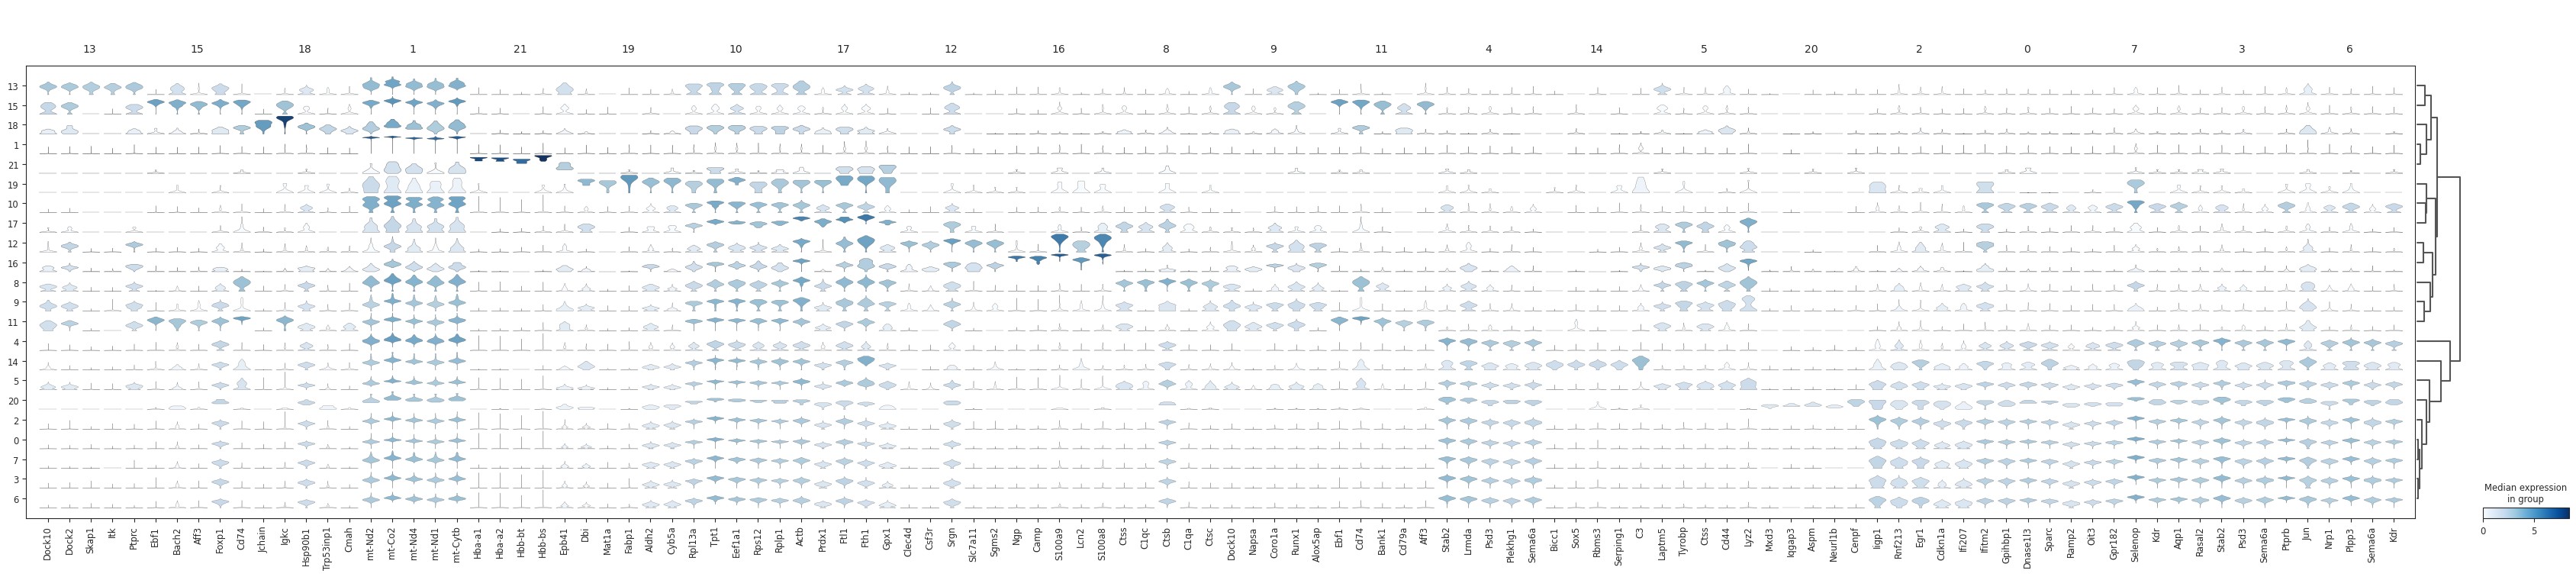

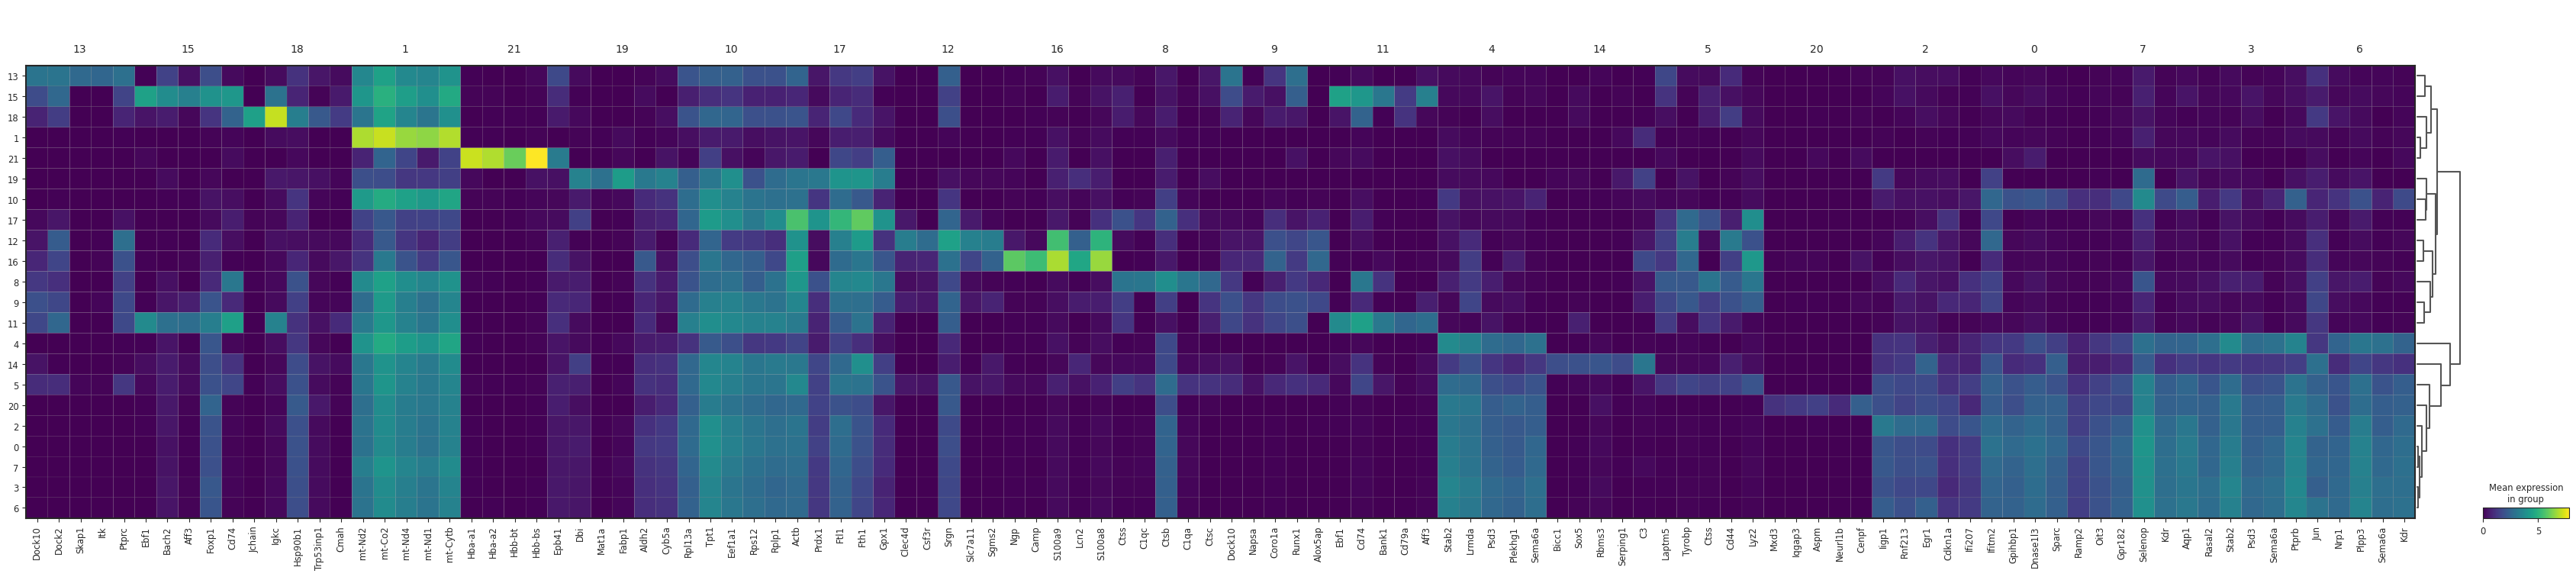

In [124]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden", show_gene_labels=True)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")

categories: B cells, Cholangiocytes, Endothelial cells, etc.
var_group_labels: 0, 1, 2, etc.


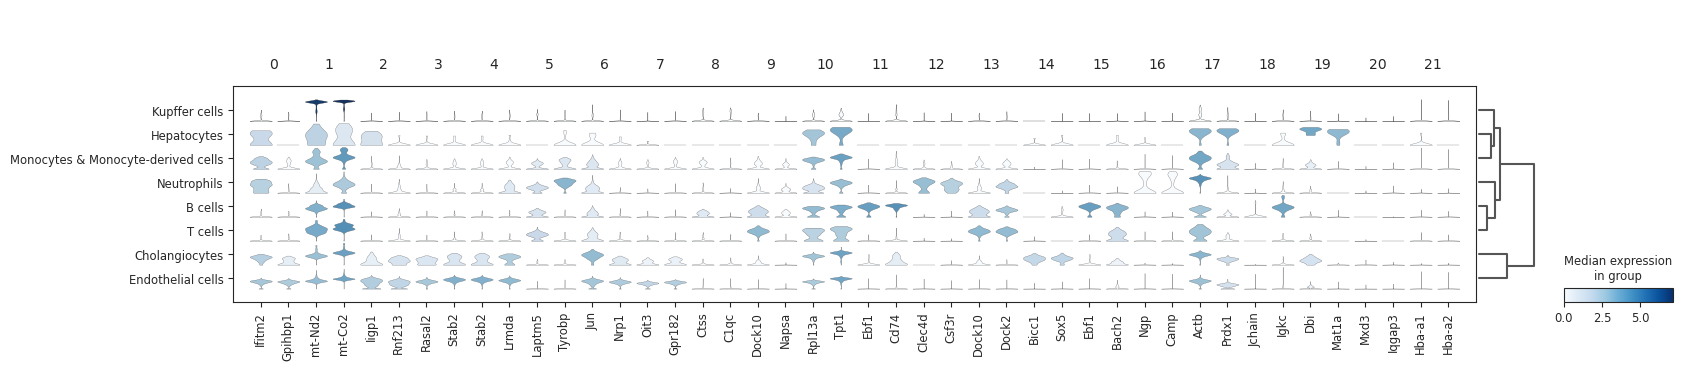

In [126]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=2, key="wilcoxon", groupby="cell_type")

In [105]:
adata.write('liver_jointly_clustered_adata.h5ad', compression='gzip')

## Compositional analysis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import warnings

from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

warnings.filterwarnings("ignore")

In [107]:
adata

AnnData object with n_obs × n_vars = 9230 × 15401
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'predicted_labels_colors', 'hvg', 'majority_voting_colors', 'cell_type_colors'
    obsm: 'X_uce', 'X_umap'
    obsp: 'distances', 'connectivities'

In [108]:
adata.obs['sample']   

AAACCCAAGGGCAGTT-1    whole
AAACCCAGTTTCGACA-1    whole
AAACCCATCGGCACTG-1    whole
AAACCCATCTCCAATT-1    whole
AAACGAAAGAAGTGTT-1    whole
                      ...  
TTTGTTGGTCACTTCC-1    whole
TTTGTTGTCCAATGCA-1    whole
TTTGTTGTCCACGTGG-1    whole
TTTGTTGTCGCCAATA-1    whole
TTTGTTGTCTCCGATC-1    whole
Name: sample, Length: 9230, dtype: category
Categories (1, object): ['whole']

In [109]:
adata.obs['treatment']  

AAACCCAAGGGCAGTT-1    normal
AAACCCAGTTTCGACA-1    normal
AAACCCATCGGCACTG-1    normal
AAACCCATCTCCAATT-1    normal
AAACGAAAGAAGTGTT-1    normal
                       ...  
TTTGTTGGTCACTTCC-1      nash
TTTGTTGTCCAATGCA-1      nash
TTTGTTGTCCACGTGG-1      nash
TTTGTTGTCGCCAATA-1      nash
TTTGTTGTCTCCGATC-1      nash
Name: treatment, Length: 9230, dtype: category
Categories (2, object): ['nash', 'normal']

In [110]:
num_tot_cells = adata.obs.groupby(['treatment']).size()  # Size gives the total count for each group
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.values))
num_tot_cells

{'nash': 5345, 'normal': 3885}

In [112]:
cell_type_counts = adata.obs.groupby(['treatment','sample','cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis=1)>0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

treatment sample                           cell_type  n_genes
0       nash  whole                             B cells      213
1       nash  whole                      Cholangiocytes       71
2       nash  whole                   Endothelial cells     4111
3       nash  whole                         Hepatocytes        7
4       nash  whole                       Kupffer cells      414
5       nash  whole  Monocytes & Monocyte-derived cells      281
6       nash  whole                         Neutrophils      186
7       nash  whole                             T cells       62
8     normal  whole                             B cells       97
9     normal  whole                      Cholangiocytes       37
10    normal  whole                   Endothelial cells     2104
11    normal  whole                         Hepatocytes        9
12    normal  whole                       Kupffer cells     1295
13    normal  whole  Monocytes & Monocyte-derived cells      182
14    normal  whole                         Neutrophils       74
15    normal  whole                             T cells       87

In [114]:
cell_type_counts['total_cells']= cell_type_counts.treatment.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.n_genes/cell_type_counts.total_cells
cell_type_counts

treatment sample                           cell_type  n_genes  total_cells  \
0       nash  whole                             B cells      213         5345   
1       nash  whole                      Cholangiocytes       71         5345   
2       nash  whole                   Endothelial cells     4111         5345   
3       nash  whole                         Hepatocytes        7         5345   
4       nash  whole                       Kupffer cells      414         5345   
5       nash  whole  Monocytes & Monocyte-derived cells      281         5345   
6       nash  whole                         Neutrophils      186         5345   
7       nash  whole                             T cells       62         5345   
8     normal  whole                             B cells       97         3885   
9     normal  whole                      Cholangiocytes       37         3885   
10    normal  whole                   Endothelial cells     2104         3885   
11    normal  whole                         Hepatocytes        9         3885   
12    normal  whole                       Kupffer cells     1295         3885   
13    normal  whole  Monocytes & Monocyte-derived cells      182         3885   
14    normal  whole                         Neutrophils       74         3885   
15    normal  whole                             T cells       87         3885   

    frequency  
0    0.039850  
1    0.013283  
2    0.769130  
3    0.001310  
4    0.077456  
5    0.052572  
6    0.034799  
7    0.011600  
8    0.024968  
9    0.009524  
10   0.541570  
11   0.002317  
12   0.333333  
13   0.046847  
14   0.019048  
15   0.022394

<function matplotlib.pyplot.show(close=None, block=None)>

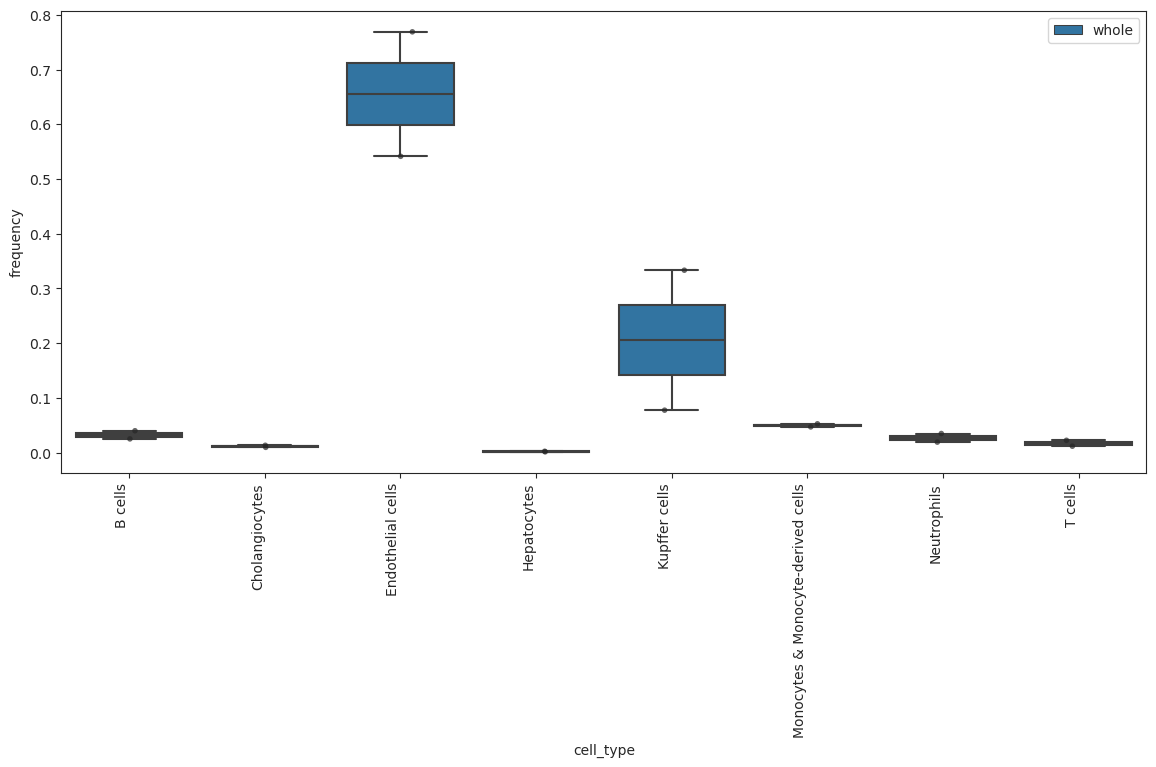

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cell_type_counts, x='cell_type', y='frequency', hue='sample')
sns.stripplot(data=cell_type_counts, x='cell_type', y='frequency', hue='sample',
              dodge=True, color='black', size=4, alpha=0.7, jitter=True)

plt.xticks(rotation=90, ha='right')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:len(set(labels))], labels[:len(set(labels))])

plt.show

In [120]:
cluster_changes = cell_type_counts.groupby(['treatment', 'cell_type'])['frequency'].mean().unstack('treatment')

# fold changes or differences
cluster_changes['change'] = cluster_changes.iloc[:, 1] - cluster_changes.iloc[:, 0]  # Adjust columns for your conditions
cluster_changes = cluster_changes.sort_values('change', ascending=False)

print(cluster_changes)

treatment                               nash    normal    change
cell_type                                                       
Kupffer cells                       0.077456  0.333333  0.255878
T cells                             0.011600  0.022394  0.010794
Hepatocytes                         0.001310  0.002317  0.001007
Cholangiocytes                      0.013283  0.009524 -0.003760
Monocytes & Monocyte-derived cells  0.052572  0.046847 -0.005726
B cells                             0.039850  0.024968 -0.014883
Neutrophils                         0.034799  0.019048 -0.015751
Endothelial cells                   0.769130  0.541570 -0.227560


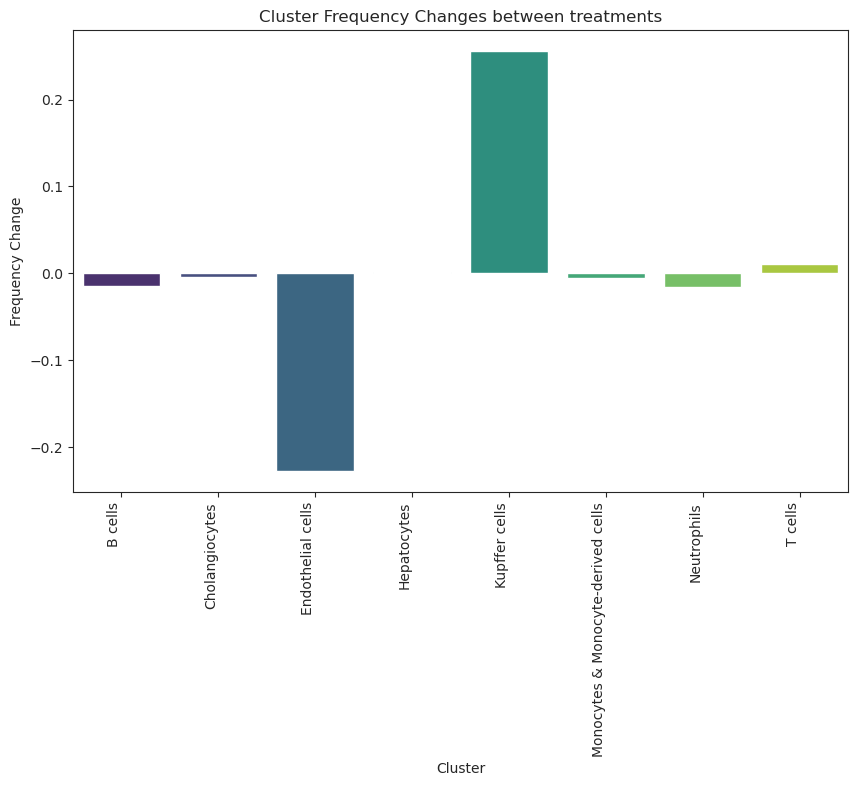

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_changes.reset_index(), x='cell_type', y='change', palette="viridis")
plt.xticks(rotation=90, ha='right')
plt.title("Cluster Frequency Changes between treatments")
plt.ylabel("Frequency Change")
plt.xlabel("Cluster")
plt.show()

## Convert to Seurat

In [14]:
import sys
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
import anndata as ad

adata = ad.read('liver_uce_adata.h5ad')

In [18]:
adata.obs

treatment sample  n_genes
AAACCCAAGGGCAGTT-1    normal  whole       63
AAACCCAGTTTCGACA-1    normal  whole     1496
AAACCCATCGGCACTG-1    normal  whole       53
AAACCCATCTCCAATT-1    normal  whole       76
AAACGAAAGAAGTGTT-1    normal  whole      146
...                      ...    ...      ...
TTTGTTGGTCACTTCC-1      nash  whole     4642
TTTGTTGTCCAATGCA-1      nash  whole      564
TTTGTTGTCCACGTGG-1      nash  whole      881
TTTGTTGTCGCCAATA-1      nash  whole     3297
TTTGTTGTCTCCGATC-1      nash  whole     2807

[9230 rows x 3 columns]

In [ ]:
from scipy import io
import os

PATH = "/home/nb752/project/cbb_uce/R_data"

In [10]:
#raw counts from file before processing

adata.layers['counts'] = adata.X.copy()

io.mmwrite(os.path.join(PATH, 'counts.mtx'), adata.layers['counts'])

In [7]:
# from file after cell type annotations
adata = ad.read('liver_jointly_clustered_adata.h5ad')

cell_meta = adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]
gene_meta = adata.var.copy()
gene_meta['GeneName'] = gene_meta.index

cell_meta.to_csv(os.path.join(PATH, 'counts_cellMeta.csv'), index=None)
gene_meta.to_csv(os.path.join(PATH, 'counts_geneMeta.csv'), index=None)

In [133]:
adata

AnnData object with n_obs × n_vars = 9230 × 15401
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'predicted_labels_colors', 'hvg', 'majority_voting_colors', 'cell_type_colors', 'wilcoxon', 'dendrogram_leiden', 'dendrogram_cell_type'
    obsm: 'X_uce', 'X_umap', 'X_pca'
    obsp: 'distances', 'connectivities'